In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading Dataframe
file_path = './data/diabetes.csv'
df = pd.read_csv(file_path)
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [3]:
# Check for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We don't have any null values

# EDA

In [4]:
# Dataset's Statitistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


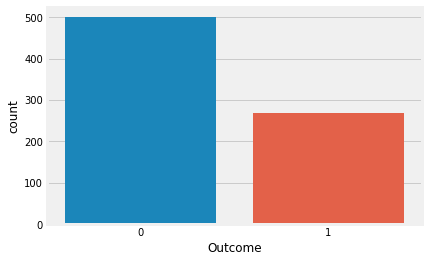

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
# Target Variable's Count plot
sns.countplot('Outcome', data=df)
plt.show()

df['Outcome'].value_counts()

We have twice as more non-diabetic patient's then diabetic patients.
( There are two ways to handel this kind of imbalance either we can balance by removing some rows of "0" target or We can add some duplicate entries of "1" target to make our dataset balanced)

We will be using latter approach as we have less data and don't want to lose any more data.

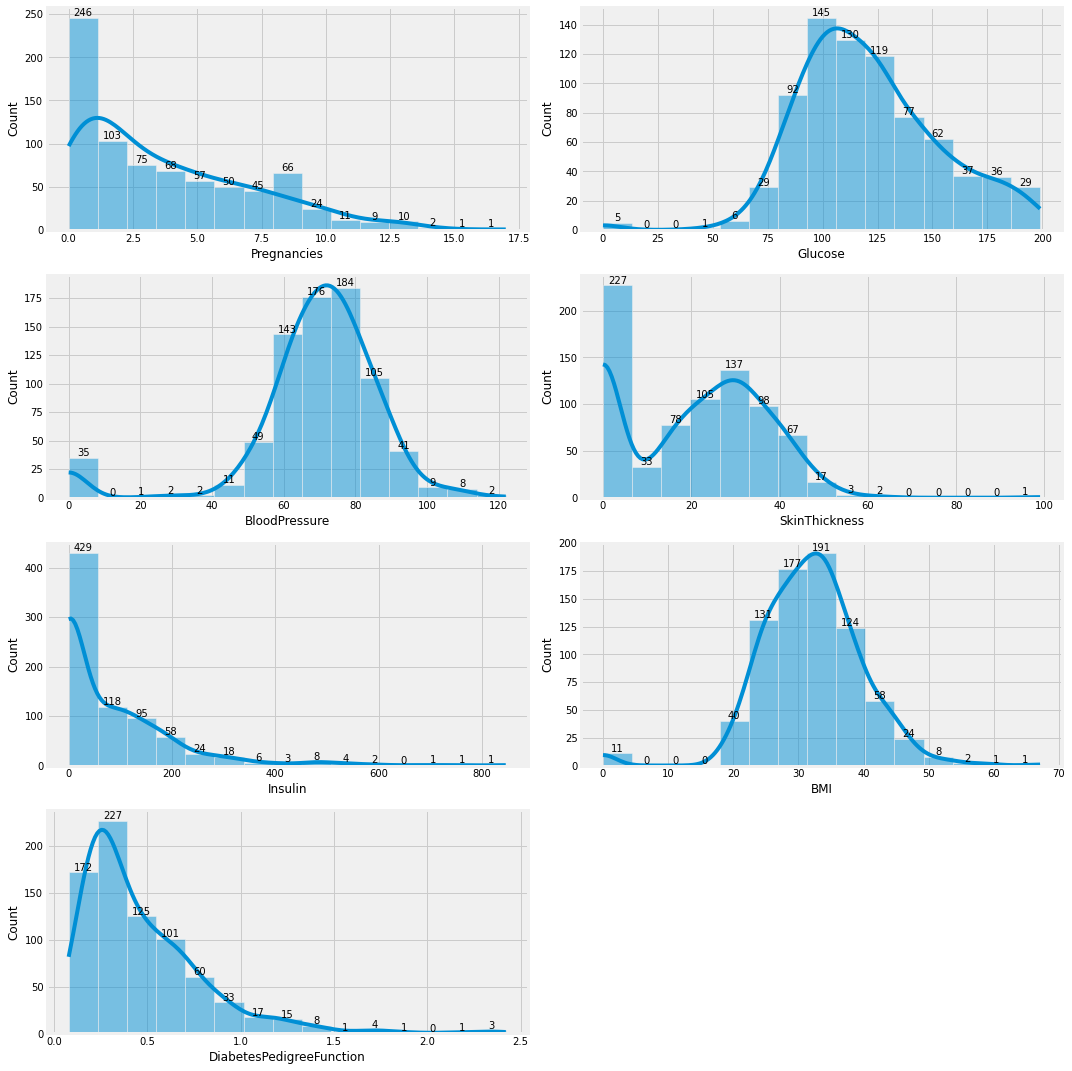

In [6]:
# Plotting Distribution of Our Features (Histplot)print(df.columns)
cols = list(df.columns) # Leanving out last outcome column
fig, axes=plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
axes = axes.ravel()
for col, ax in zip(cols, axes):
  sns.histplot(df[col], ax=ax, bins=15, kde=True, palette='winter_r')
  ax.set_ylabel("Count")
  
  # If you want to show values on chart
  for i in ax.containers:
    ax.bar_label(i,)

plt.delaxes()
fig.tight_layout()
plt.show()

💡 Insight's
1. BMI has nice normal distribution centered around 32 approx
2. Pregnencies,Insulin and DiabetesPedigreeFunction seeps to be right skewed as most values lie on left size of distribution.
3. SkinThickness has two peaks in distribution indicating there might be two groups of data. onw with

<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

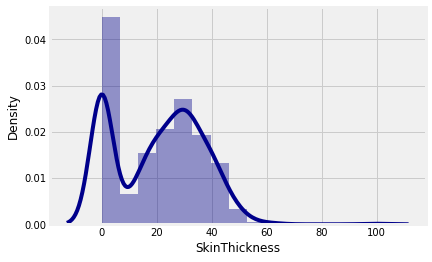

In [7]:
sns.distplot(df['SkinThickness'], color='darkblue')

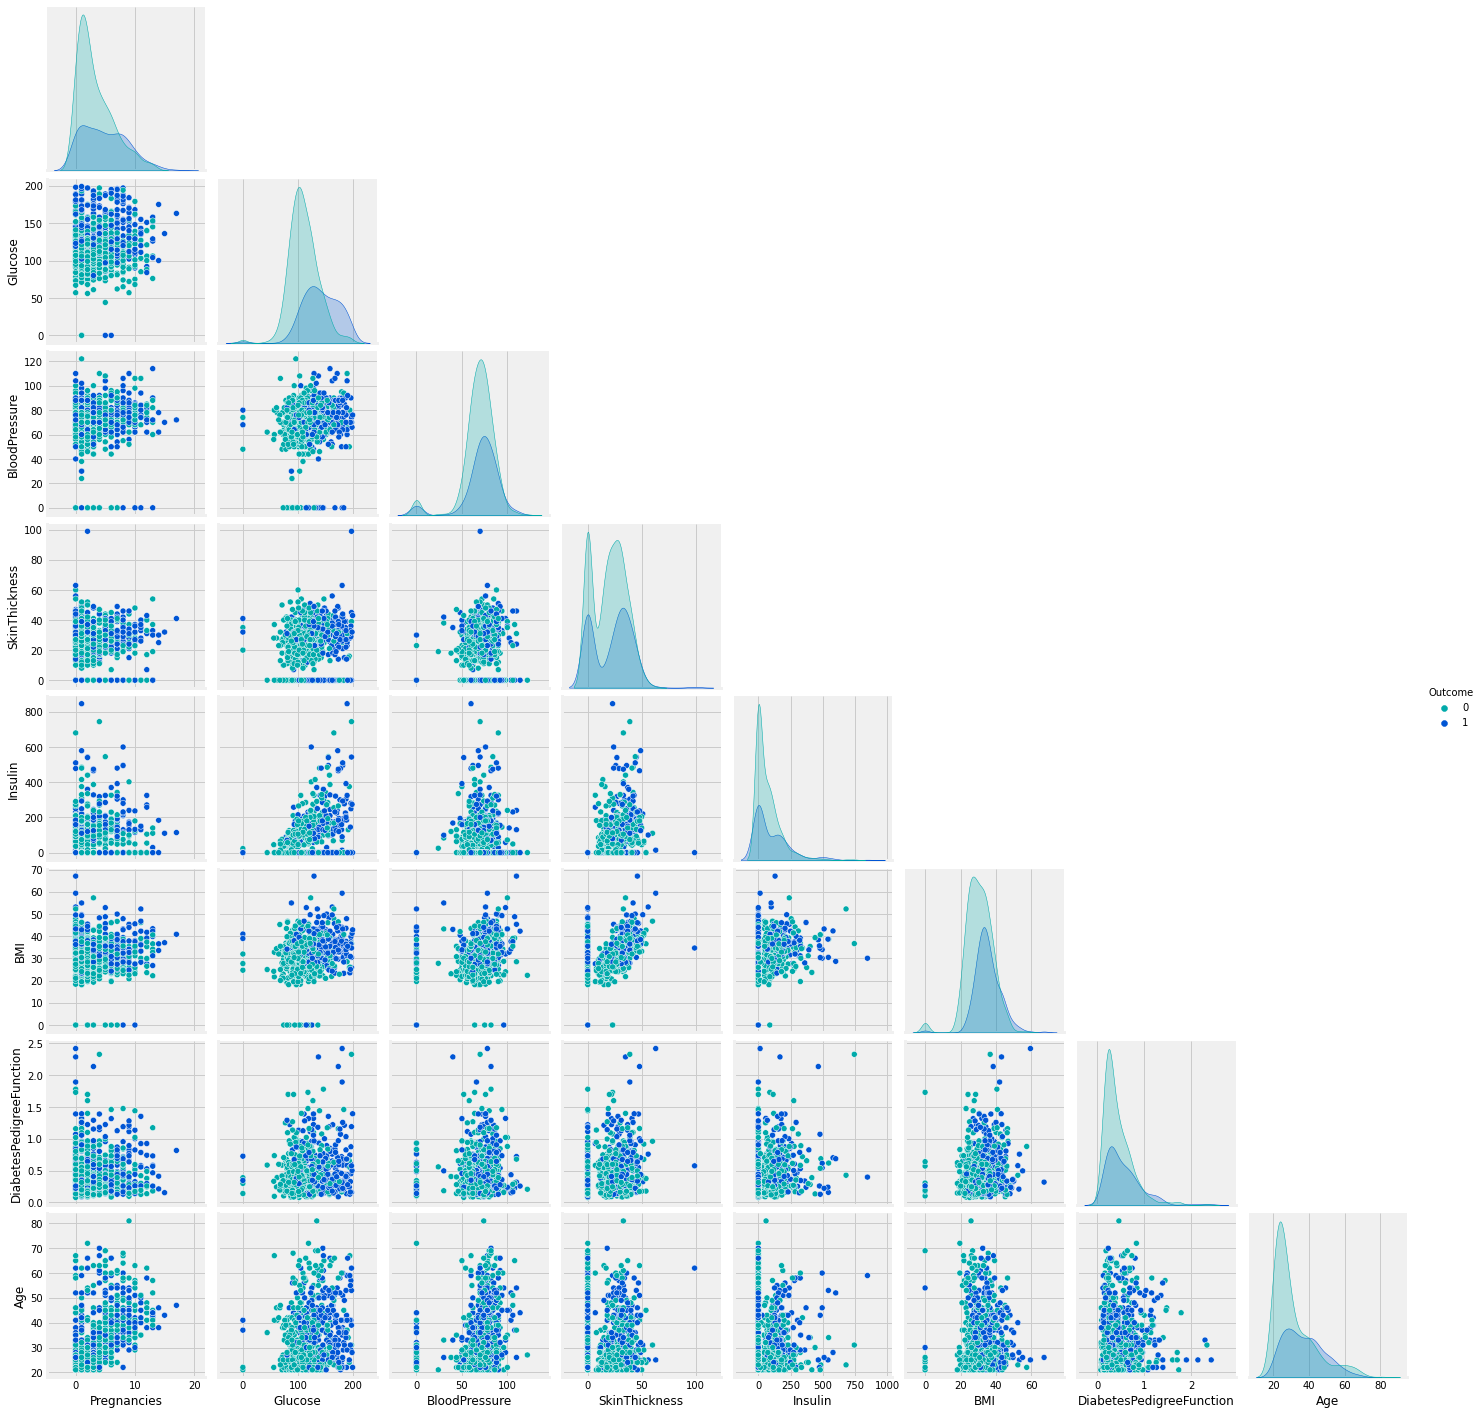

In [8]:
# Dataste Pairplot
sns.pairplot(df, hue='Outcome', palette='winter_r', corner=True)
plt.show()

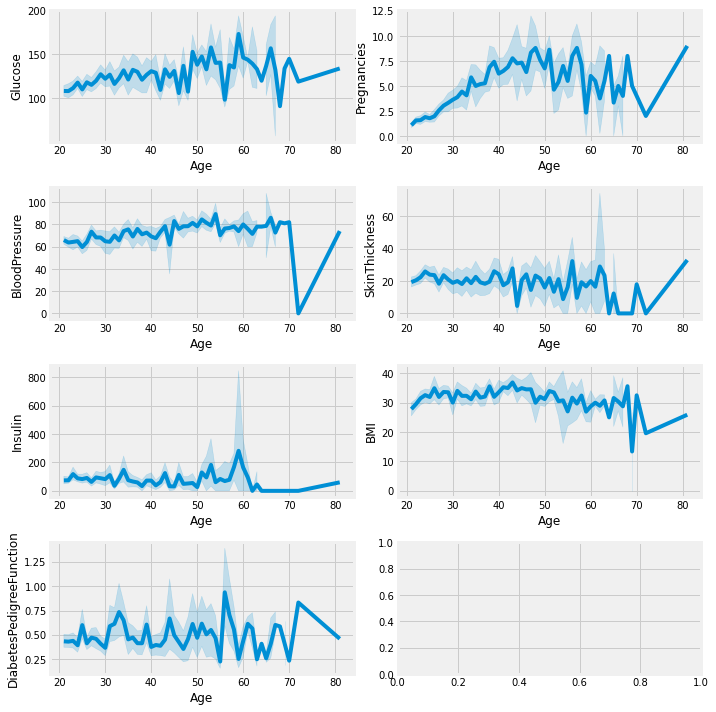

In [9]:
 cols = ['Glucose', 'Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
axes = axes.ravel()
for col, ax in zip(cols, axes):
  sns.lineplot(x="Age",y=col,data=df, ax=ax, palette='winter_r')
fig.tight_layout()
plt.show()

💡 Insight's
1. In our dataset highest Insulin and DiabetesPedigreeFunction is at age about 58-59
2. Same can be said about Glucose.
3. Pregrencies are higher in age of 40 to 50 and tend to decrease.

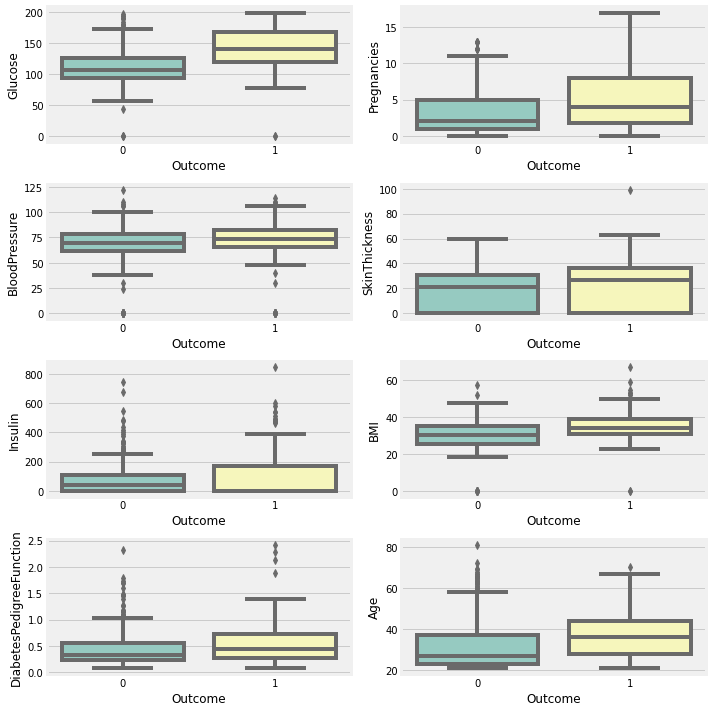

In [10]:
cols = ['Glucose', 'Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
axes = axes.ravel()
for col, ax in zip(cols, axes):
  sns.boxplot(x="Outcome", y=col, data=df, palette="Set3", ax=ax)

fig.tight_layout()
plt.show()

💡 Insight's
1. Diabetic patient's tend to have higher glucose than normal patient
2. Blood Pressure does not seem to have any affect in diabetic vs normal patients

<AxesSubplot:>

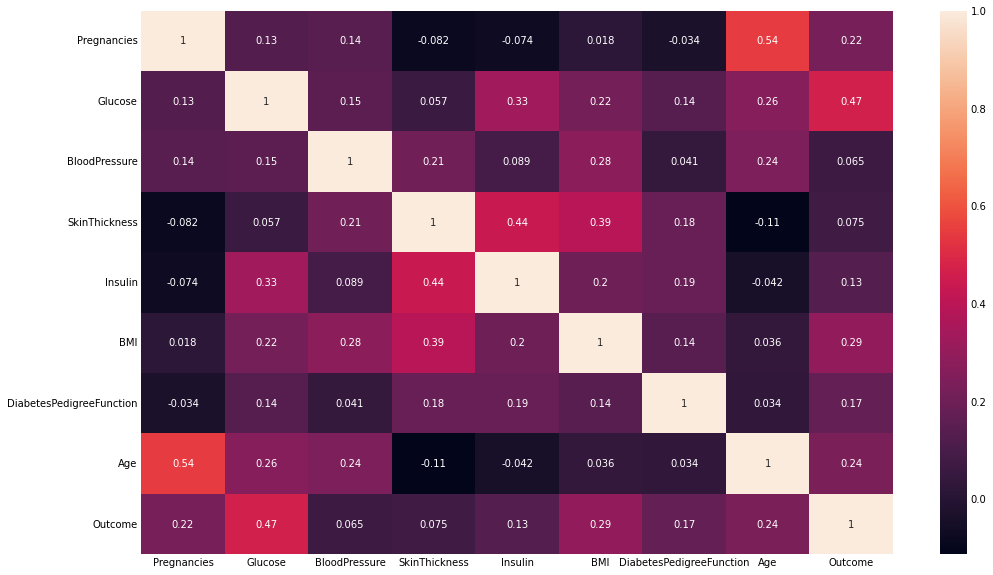

In [11]:
# Correlation Matrix
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)

💡 Glucose has Highest correlation with our target variable or around 0.47.

# Preprocessing

1. There are no null values in our dataset so that's done.
2. Balance Dataset
4. Scale Dataset
3. Next, let's split data into train, test and validation

In [12]:
# Seperating target form data
X = df.drop('Outcome', axis=1)
y = df['Outcome']

## Feature Importance

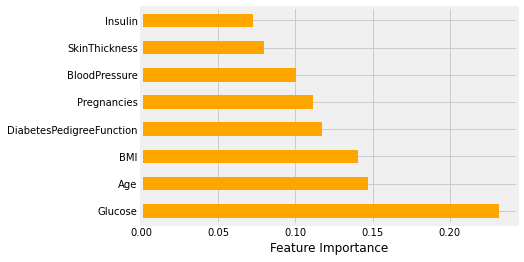

In [13]:
def feature_importance(X, y):
  # Using ExtraTreeClassifier

  from sklearn.ensemble import ExtraTreesClassifier
  import matplotlib.pyplot as plt
  import pandas as pd

  model = ExtraTreesClassifier()
  model.fit(X, y)

  feature_importance = pd.Series(model.feature_importances_, index=X.columns)
  feature_importance.nlargest(10).plot(kind='barh', color='orange')
  plt.xlabel('Feature Importance')
  plt.show()

feature_importance(X, y)

## Balancing Dataset

<AxesSubplot:xlabel='Outcome', ylabel='count'>

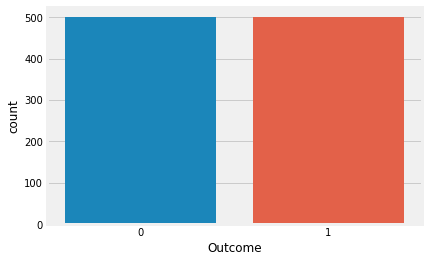

In [14]:
# Over-Sampling Dataset(i.e Balancing by adding duplicate rows)
# Balancing Dataset by adding more duplicate rows using imbalanced-learn library

# Install Imbalanced-Learn
# pip install -U imbalanced-learn

# Import
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler()
X_bal, y_bal = ROS.fit_resample(X, y)

sns.countplot(y_bal)

## Splitting Data into Train, Test, Validation

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.4)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5)
print('X_Train Shape: ', X_train.shape)
print('X_Test Shape: ', X_test.shape)
print('X_Valid Shape: ', X_valid.shape)


X_Train Shape:  (600, 8)
X_Test Shape:  (200, 8)
X_Valid Shape:  (200, 8)


## Scaling Data.

In [61]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_train_std = SS.fit_transform(X_train)
X_test_std = SS.transform(X_test)
X_valid_std = SS.transform(X_valid)

# Training 

In [17]:
# Our Models to Try
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

models = {
  "Logistic Regression": LogisticRegression(),
  "SVM": SVC(),
  "Linear SVM": LinearSVC(),
  "Nearest Centroid": NearestCentroid(),
  # "Bernoulli NB": BernoulliNB(), # Doesn't Support on Scaled Dataset
  # "Complement NB": ComplementNB(), 
  # "Multinomial NB": MultinomialNB(), 
  "Preceptron": Perceptron(),
  "KNeighbors Classifier": KNeighborsClassifier(),
  "Random Forest Classifier": RandomForestClassifier(),
  "Bagging Classifier": BaggingClassifier(),
  "Decision Tree Classifier": DecisionTreeClassifier(),
  "MLP Classifier": MLPClassifier(),
  }

In [18]:
def Classifier(models, x_train, y_train, x_test, y_test):
  models_names = []
  accuracies = []
  
  for model_name, model in models.items():
    model.fit(x_train, y_train)
    accuracy = np.round(model.score(x_test, y_test), 2)
    models_names.append(model_name)
    accuracies.append(accuracy)

  # Creating DataFrame for models and accuracys
  models_scores = pd.DataFrame(zip(models_names, accuracies), columns=['Model Name', 'Accuracy'])
  
  # Sorting aur table based on accuracies descending
  accuracy_table = models_scores.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)

  return accuracy_table

# print('Accuracy On Unscaled Dataset')
# display(Classifier(models, X_train, y_train, X_test, y_test))

print('Accuracy On Scaled Dataset')
display(Classifier(models, X_train_std, y_train, X_test_std, y_test))

Accuracy On Scaled Dataset


,Model Name,Accuracy
0,Bagging Classifier,0.82
1,Random Forest Classifier,0.81
2,Decision Tree Classifier,0.78
3,Logistic Regression,0.77
4,SVM,0.77
5,Linear SVM,0.77
6,MLP Classifier,0.77
7,Nearest Centroid,0.74
8,KNeighbors Classifier,0.74
9,Preceptron,0.72


# Training Using Neural Network

In [19]:
# Importing Libraries

import tensorflow as tf

In [85]:
# Initializing Model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compiling Model
model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
  loss=tf.keras.losses.BinaryCrossentropy(),
  metrics=['accuracy'])

In [86]:
# Training Model
history = model.fit(X_train_std, y_train, batch_size=16, epochs=50, validation_data=(X_valid_std, y_valid))

Epoch 1/50
38/38 [==============================] - 1s 17ms/step - loss: 0.6969 - accuracy: 0.5550 - val_loss: 0.6598 - val_accuracy: 0.6400
Epoch 2/50
38/38 [==============================] - 0s 3ms/step - loss: 0.6571 - accuracy: 0.6417 - val_loss: 0.6328 - val_accuracy: 0.7300
Epoch 3/50
38/38 [==============================] - 0s 4ms/step - loss: 0.6237 - accuracy: 0.6483 - val_loss: 0.6133 - val_accuracy: 0.7400
Epoch 4/50
38/38 [==============================] - 0s 3ms/step - loss: 0.6244 - accuracy: 0.6767 - val_loss: 0.5945 - val_accuracy: 0.7550
Epoch 5/50
38/38 [==============================] - 0s 4ms/step - loss: 0.5921 - accuracy: 0.6933 - val_loss: 0.5819 - val_accuracy: 0.7500
Epoch 6/50
38/38 [==============================] - 0s 3ms/step - loss: 0.5891 - accuracy: 0.7083 - val_loss: 0.5735 - val_accuracy: 0.7450
Epoch 7/50
38/38 [==============================] - 0s 6ms/step - loss: 0.5871 - accuracy: 0.7067 - val_loss: 0.5684 - val_accuracy: 0.7600
Epoch 8/50
38/38 [=

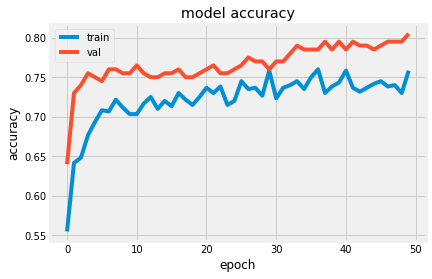

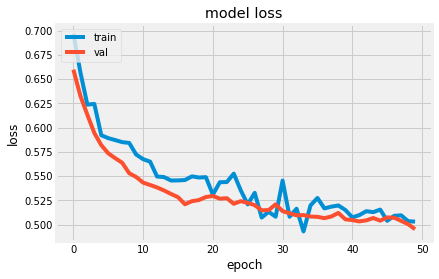

In [87]:
# Plot's Accuracy and Loss of Model
def training_graph(history):
  # Accuracy Plot
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  # Loss Plot
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

training_graph(history)

In [88]:
model.evaluate(X_test_std, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.8250


[0.4263541102409363, 0.824999988079071]